SISTEM REKOMENDASI PEMBELIAN HP - METODE FUZZY MAMDANI


######################################################################
# KASUS 1: HP murah dengan spesifikasi tinggi
######################################################################

METODE FUZZY MAMDANI

STEP 1: FUZZIFIKASI
Input: Harga = Rp 10 juta, Spesifikasi = 75

Derajat Keanggotaan Harga:
  - Murah  : 0.1667
  - Sedang : 0.2857
  - Mahal  : 0.0000

Derajat Keanggotaan Spesifikasi:
  - Rendah : 0.0000
  - Sedang : 0.0000
  - Tinggi : 1.0000

STEP 2: INFERENSI (Rule Evaluation)
  Rule 3: IF Harga Murah & Spec Tinggi THEN SANGAT (α = 0.1667)
  Rule 6: IF Harga Sedang & Spec Tinggi THEN SANGAT (α = 0.2857)

STEP 3: DEFUZZIFIKASI (Metode Centroid)
  Hasil Centroid: 81.3668

HASIL AKHIR: 81.37/100 → SANGAT DIREKOMENDASIKAN ✓✓

Menampilkan visualisasi defuzzifikasi...


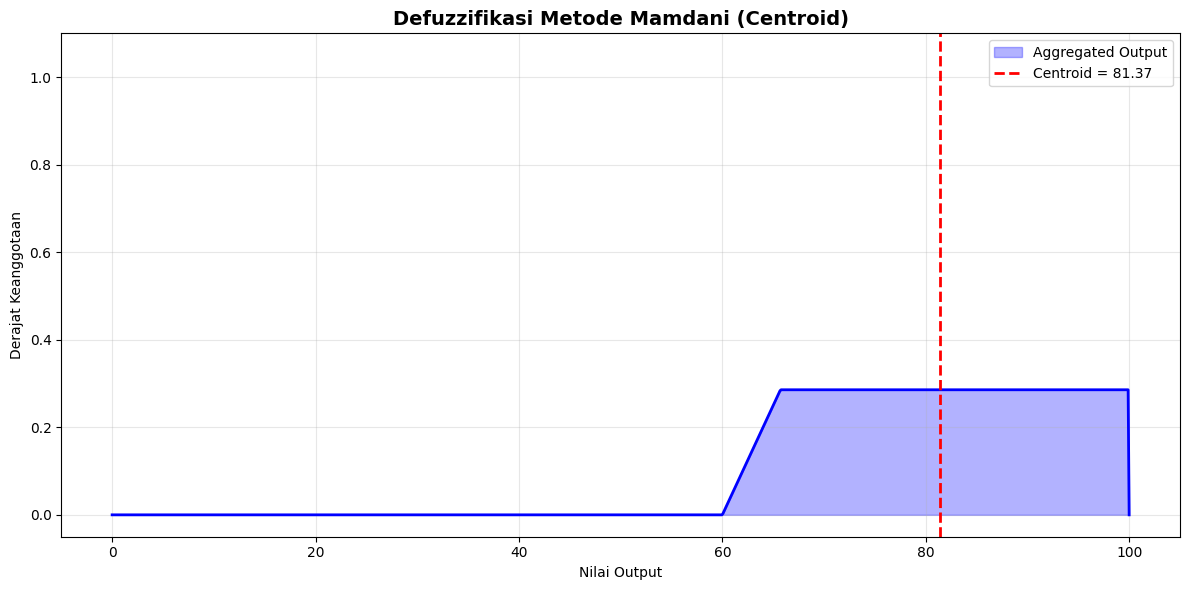



######################################################################
# KASUS 2: HP harga sedang dengan spesifikasi sedang
######################################################################

METODE FUZZY MAMDANI

STEP 1: FUZZIFIKASI
Input: Harga = Rp 20 juta, Spesifikasi = 45

Derajat Keanggotaan Harga:
  - Murah  : 0.0000
  - Sedang : 0.2857
  - Mahal  : 0.5000

Derajat Keanggotaan Spesifikasi:
  - Rendah : 0.1000
  - Sedang : 0.7500
  - Tinggi : 0.0000

STEP 2: INFERENSI (Rule Evaluation)
  Rule 4: IF Harga Sedang & Spec Rendah THEN TIDAK (α = 0.1000)
  Rule 5: IF Harga Sedang & Spec Sedang THEN CUKUP (α = 0.2857)
  Rule 7: IF Harga Mahal & Spec Rendah THEN TIDAK (α = 0.1000)
  Rule 8: IF Harga Mahal & Spec Sedang THEN TIDAK (α = 0.5000)

STEP 3: DEFUZZIFIKASI (Metode Centroid)
  Hasil Centroid: 32.9585

HASIL AKHIR: 32.96/100 → TIDAK DIREKOMENDASIKAN ❌


######################################################################
# KASUS 3: HP mahal dengan spesifikasi rendah
######

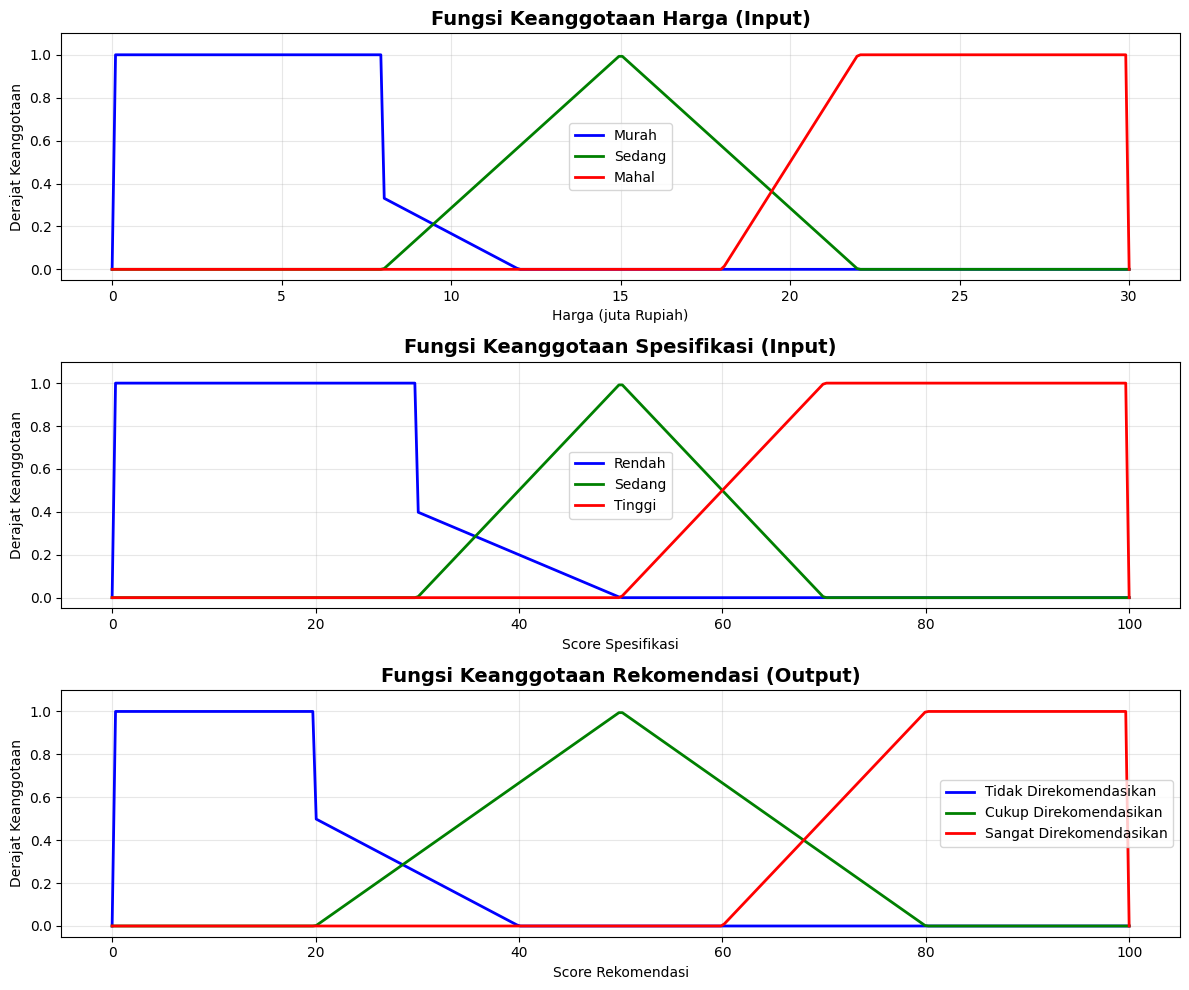


PROGRAM SELESAI


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class FuzzyMamdaniLaptop:
    """
    Sistem Rekomendasi Pembelian HP menggunakan Fuzzy Mamdani
    Input: Harga (juta rupiah), Spesifikasi Score (0-100)
    Output: Rekomendasi Pembelian (0-100)
    """

    def __init__(self):
        # Range variabel
        self.price_range = [0, 30]  # juta rupiah
        self.spec_range = [0, 100]   # score spesifikasi
        self.recommendation_range = [0, 100]  # score rekomendasi

    # ========== FUNGSI KEANGGOTAAN ==========

    def trimf(self, x, params):
        """Triangular membership function"""
        a, b, c = params
        if x <= a or x >= c:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        else:
            return (c - x) / (c - b)

    def trapmf(self, x, params):
        """Trapezoidal membership function"""
        a, b, c, d = params
        if x <= a or x >= d:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return 1
        else:
            return (d - x) / (d - a)

    # ========== FUZZIFIKASI HARGA ==========

    def fuzzify_price(self, price):
        """Fuzzifikasi harga: Murah, Sedang, Mahal"""
        murah = self.trapmf(price, [0, 0, 8, 12])
        sedang = self.trimf(price, [8, 15, 22])
        mahal = self.trapmf(price, [18, 22, 30, 30])
        return {'murah': murah, 'sedang': sedang, 'mahal': mahal}

    # ========== FUZZIFIKASI SPESIFIKASI ==========

    def fuzzify_spec(self, spec):
        """Fuzzifikasi spesifikasi: Rendah, Sedang, Tinggi"""
        rendah = self.trapmf(spec, [0, 0, 30, 50])
        sedang = self.trimf(spec, [30, 50, 70])
        tinggi = self.trapmf(spec, [50, 70, 100, 100])
        return {'rendah': rendah, 'sedang': sedang, 'tinggi': tinggi}

    # ========== ATURAN FUZZY ==========

    def apply_rules(self, price_mf, spec_mf):
        """
        Aturan Fuzzy (9 rules):
        1. Harga Murah & Spec Rendah → Tidak Direkomendasikan
        2. Harga Murah & Spec Sedang → Cukup Direkomendasikan
        3. Harga Murah & Spec Tinggi → Sangat Direkomendasikan
        4. Harga Sedang & Spec Rendah → Tidak Direkomendasikan
        5. Harga Sedang & Spec Sedang → Cukup Direkomendasikan
        6. Harga Sedang & Spec Tinggi → Sangat Direkomendasikan
        7. Harga Mahal & Spec Rendah → Tidak Direkomendasikan
        8. Harga Mahal & Spec Sedang → Tidak Direkomendasikan
        9. Harga Mahal & Spec Tinggi → Cukup Direkomendasikan
        """
        rules = []

        # Rule 1: Murah & Rendah → Tidak
        alpha1 = min(price_mf['murah'], spec_mf['rendah'])
        rules.append(('tidak', alpha1, 'Harga Murah & Spec Rendah'))

        # Rule 2: Murah & Sedang → Cukup
        alpha2 = min(price_mf['murah'], spec_mf['sedang'])
        rules.append(('cukup', alpha2, 'Harga Murah & Spec Sedang'))

        # Rule 3: Murah & Tinggi → Sangat
        alpha3 = min(price_mf['murah'], spec_mf['tinggi'])
        rules.append(('sangat', alpha3, 'Harga Murah & Spec Tinggi'))

        # Rule 4: Sedang & Rendah → Tidak
        alpha4 = min(price_mf['sedang'], spec_mf['rendah'])
        rules.append(('tidak', alpha4, 'Harga Sedang & Spec Rendah'))

        # Rule 5: Sedang & Sedang → Cukup
        alpha5 = min(price_mf['sedang'], spec_mf['sedang'])
        rules.append(('cukup', alpha5, 'Harga Sedang & Spec Sedang'))

        # Rule 6: Sedang & Tinggi → Sangat
        alpha6 = min(price_mf['sedang'], spec_mf['tinggi'])
        rules.append(('sangat', alpha6, 'Harga Sedang & Spec Tinggi'))

        # Rule 7: Mahal & Rendah → Tidak
        alpha7 = min(price_mf['mahal'], spec_mf['rendah'])
        rules.append(('tidak', alpha7, 'Harga Mahal & Spec Rendah'))

        # Rule 8: Mahal & Sedang → Tidak
        alpha8 = min(price_mf['mahal'], spec_mf['sedang'])
        rules.append(('tidak', alpha8, 'Harga Mahal & Spec Sedang'))

        # Rule 9: Mahal & Tinggi → Cukup
        alpha9 = min(price_mf['mahal'], spec_mf['tinggi'])
        rules.append(('cukup', alpha9, 'Harga Mahal & Spec Tinggi'))

        return rules

    # ========== METODE MAMDANI ==========

    def mamdani_defuzzify(self, rules):
        """
        Defuzzifikasi menggunakan metode Mamdani (Centroid)
        1. Implication: MIN (potong fungsi keanggotaan dengan alpha)
        2. Aggregation: MAX (gabungkan semua hasil)
        3. Defuzzification: Centroid (pusat massa)
        """
        x = np.linspace(0, 100, 1000)
        output_mf = np.zeros_like(x)

        for category, alpha, desc in rules:
            if alpha > 0:  # Hanya proses rule yang aktif
                # Fungsi keanggotaan output
                if category == 'tidak':
                    mf = np.array([self.trapmf(xi, [0, 0, 20, 40]) for xi in x])
                elif category == 'cukup':
                    mf = np.array([self.trimf(xi, [20, 50, 80]) for xi in x])
                else:  # sangat
                    mf = np.array([self.trapmf(xi, [60, 80, 100, 100]) for xi in x])

                # Implication: MIN (potong dengan alpha)
                clipped_mf = np.minimum(mf, alpha)

                # Aggregation: MAX (gabungkan)
                output_mf = np.maximum(output_mf, clipped_mf)

        # Defuzzification: Centroid
        if np.sum(output_mf) == 0:
            return 0, output_mf, x

        centroid = np.sum(x * output_mf) / np.sum(output_mf)
        return centroid, output_mf, x

    # ========== FUNGSI UTAMA ==========

    def evaluate(self, price, spec):
        """
        Evaluasi sistem fuzzy Mamdani
        price: harga HP (juta rupiah)
        spec: score spesifikasi (0-100)
        """
        print(f"\n{'='*70}")
        print(f"METODE FUZZY MAMDANI")
        print(f"{'='*70}")

        # Step 1: Fuzzifikasi
        print(f"\nSTEP 1: FUZZIFIKASI")
        print(f"Input: Harga = Rp {price} juta, Spesifikasi = {spec}")

        price_mf = self.fuzzify_price(price)
        spec_mf = self.fuzzify_spec(spec)

        print(f"\nDerajat Keanggotaan Harga:")
        print(f"  - Murah  : {price_mf['murah']:.4f}")
        print(f"  - Sedang : {price_mf['sedang']:.4f}")
        print(f"  - Mahal  : {price_mf['mahal']:.4f}")

        print(f"\nDerajat Keanggotaan Spesifikasi:")
        print(f"  - Rendah : {spec_mf['rendah']:.4f}")
        print(f"  - Sedang : {spec_mf['sedang']:.4f}")
        print(f"  - Tinggi : {spec_mf['tinggi']:.4f}")

        # Step 2: Aplikasi aturan (Inference)
        print(f"\nSTEP 2: INFERENSI (Rule Evaluation)")
        rules = self.apply_rules(price_mf, spec_mf)

        for idx, (cat, alpha, desc) in enumerate(rules, 1):
            if alpha > 0:
                print(f"  Rule {idx}: IF {desc} THEN {cat.upper()} (α = {alpha:.4f})")

        # Step 3: Defuzzifikasi
        print(f"\nSTEP 3: DEFUZZIFIKASI (Metode Centroid)")
        result, output_mf, x = self.mamdani_defuzzify(rules)

        print(f"  Hasil Centroid: {result:.4f}")

        # Interpretasi
        if result < 40:
            interpretasi = "TIDAK DIREKOMENDASIKAN"
            emoji = "❌"
        elif result < 70:
            interpretasi = "CUKUP DIREKOMENDASIKAN"
            emoji = "✓"
        else:
            interpretasi = "SANGAT DIREKOMENDASIKAN"
            emoji = "✓✓"

        print(f"\n{'='*70}")
        print(f"HASIL AKHIR: {result:.2f}/100 → {interpretasi} {emoji}")
        print(f"{'='*70}")

        return result, price_mf, spec_mf, rules, output_mf, x

    # ========== VISUALISASI ==========

    def plot_membership_functions(self):
        """Plot fungsi keanggotaan"""
        fig, axes = plt.subplots(3, 1, figsize=(12, 10))

        # Harga
        x_price = np.linspace(0, 30, 300)
        murah = [self.trapmf(x, [0, 0, 8, 12]) for x in x_price]
        sedang = [self.trimf(x, [8, 15, 22]) for x in x_price]
        mahal = [self.trapmf(x, [18, 22, 30, 30]) for x in x_price]

        axes[0].plot(x_price, murah, 'b-', label='Murah', linewidth=2)
        axes[0].plot(x_price, sedang, 'g-', label='Sedang', linewidth=2)
        axes[0].plot(x_price, mahal, 'r-', label='Mahal', linewidth=2)
        axes[0].set_title('Fungsi Keanggotaan Harga (Input)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Harga (juta Rupiah)')
        axes[0].set_ylabel('Derajat Keanggotaan')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].set_ylim([-0.05, 1.1])

        # Spesifikasi
        x_spec = np.linspace(0, 100, 300)
        rendah = [self.trapmf(x, [0, 0, 30, 50]) for x in x_spec]
        sedang = [self.trimf(x, [30, 50, 70]) for x in x_spec]
        tinggi = [self.trapmf(x, [50, 70, 100, 100]) for x in x_spec]

        axes[1].plot(x_spec, rendah, 'b-', label='Rendah', linewidth=2)
        axes[1].plot(x_spec, sedang, 'g-', label='Sedang', linewidth=2)
        axes[1].plot(x_spec, tinggi, 'r-', label='Tinggi', linewidth=2)
        axes[1].set_title('Fungsi Keanggotaan Spesifikasi (Input)', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Score Spesifikasi')
        axes[1].set_ylabel('Derajat Keanggotaan')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        axes[1].set_ylim([-0.05, 1.1])

        # Rekomendasi
        x_rec = np.linspace(0, 100, 300)
        tidak = [self.trapmf(x, [0, 0, 20, 40]) for x in x_rec]
        cukup = [self.trimf(x, [20, 50, 80]) for x in x_rec]
        sangat = [self.trapmf(x, [60, 80, 100, 100]) for x in x_rec]

        axes[2].plot(x_rec, tidak, 'b-', label='Tidak Direkomendasikan', linewidth=2)
        axes[2].plot(x_rec, cukup, 'g-', label='Cukup Direkomendasikan', linewidth=2)
        axes[2].plot(x_rec, sangat, 'r-', label='Sangat Direkomendasikan', linewidth=2)
        axes[2].set_title('Fungsi Keanggotaan Rekomendasi (Output)', fontsize=14, fontweight='bold')
        axes[2].set_xlabel('Score Rekomendasi')
        axes[2].set_ylabel('Derajat Keanggotaan')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        axes[2].set_ylim([-0.05, 1.1])

        plt.tight_layout()
        plt.savefig('membership_functions_mamdani.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_defuzzification(self, output_mf, x, centroid):
        """Plot proses defuzzifikasi Mamdani"""
        plt.figure(figsize=(12, 6))

        # Plot aggregated output
        plt.fill_between(x, 0, output_mf, alpha=0.3, color='blue', label='Aggregated Output')
        plt.plot(x, output_mf, 'b-', linewidth=2)

        # Plot centroid
        plt.axvline(x=centroid, color='red', linestyle='--', linewidth=2, label=f'Centroid = {centroid:.2f}')

        plt.title('Defuzzifikasi Metode Mamdani (Centroid)', fontsize=14, fontweight='bold')
        plt.xlabel('Nilai Output')
        plt.ylabel('Derajat Keanggotaan')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim([-0.05, 1.1])

        plt.tight_layout()
        plt.savefig('defuzzification_mamdani.png', dpi=300, bbox_inches='tight')
        plt.show()


# ========== CONTOH PENGGUNAAN ==========

if __name__ == "__main__":
    # Inisialisasi sistem
    fuzzy_mamdani = FuzzyMamdaniLaptop()

    print("="*70)
    print("SISTEM REKOMENDASI PEMBELIAN HP - METODE FUZZY MAMDANI")
    print("="*70)

    # Contoh kasus
    test_cases = [
        {"harga": 10, "spesifikasi": 75, "deskripsi": "HP murah dengan spesifikasi tinggi"},
        {"harga": 20, "spesifikasi": 45, "deskripsi": "HP harga sedang dengan spesifikasi sedang"},
        {"harga": 25, "spesifikasi": 35, "deskripsi": "HP mahal dengan spesifikasi rendah"},
    ]

    results = []
    for i, case in enumerate(test_cases, 1):
        print(f"\n\n{'#'*70}")
        print(f"# KASUS {i}: {case['deskripsi']}")
        print(f"{'#'*70}")

        result, price_mf, spec_mf, rules, output_mf, x = fuzzy_mamdani.evaluate(
            case['harga'], case['spesifikasi']
        )
        results.append(result)

        # Visualisasi defuzzifikasi untuk kasus pertama
        if i == 1:
            print("\nMenampilkan visualisasi defuzzifikasi...")
            fuzzy_mamdani.plot_defuzzification(output_mf, x, result)

    # Visualisasi fungsi keanggotaan
    print("\n\nMenampilkan visualisasi fungsi keanggotaan...")
    fuzzy_mamdani.plot_membership_functions()

    print("\n" + "="*70)
    print("PROGRAM SELESAI")
    print("="*70)